## Observations and Insights

# My findings:

# 1. It is clear that out of the different treatment regiments Capomulin and Ramicane outperform all of the other options.
# 2. Capomulin and Ramicane have the lowest tumor volume after a 45 day study period.
# 3. There is a positive correlation between average tumor volume and weight within the mice being tested.


## Dependencies and starter code

In [26]:
%matplotlib notebook
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen

reg = data_df.groupby('Drug Regimen')
sumreg = reg.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
sumreg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [28]:
# Generate a bar plot showing number of data points for each treatment 
# regimen using pandas

panbar = data_df.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
datapanbar = pd.DataFrame(panbar)

datapanbar.head()

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186


Text(0, 0.5, 'Number of Data Points')

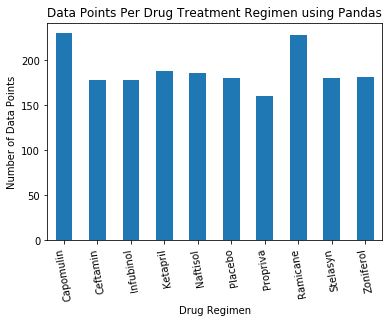

In [29]:
regimenplot = datapanbar.plot.bar(legend=False,rot=100)
regimenplot

plt.title("Data Points Per Drug Treatment Regimen using Pandas")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")



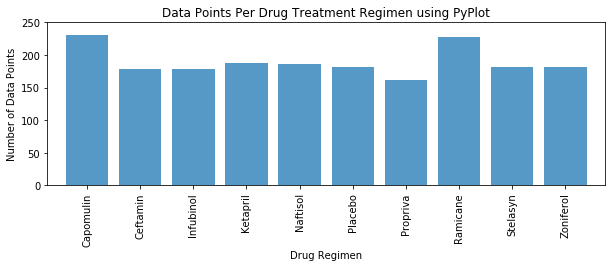

In [30]:
# Generate a bar plot showing number of data points for each treatment 
# regimen using pyplot

x_axis = np.arange(len(datapanbar))
tick_locations = [x for x in x_axis]

plt.figure(figsize=(10,3))

numplot = datapanbar.reset_index()
numplot

plt.bar(x_axis, datapanbar['Tumor Volume (mm3)'], alpha=0.75, align="center")
plt.xticks(tick_locations, numplot['Drug Regimen'], rotation="vertical")

plt.xlim(-0.75, len(datapanbar)-0.25)
plt.ylim(0, 250)

plt.title("Data Points Per Drug Treatment Regimen using PyPlot")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.show()

## Pie plots

In [31]:
# Generate a bar plot showing number of data points for each treatment 
# regimen using pyplot
gender = mouse_metadata.groupby("Sex").count()
gender

,Mouse ID,Drug Regimen,Age_months,Weight (g)
Sex,,,,
Female,124,124,124,124
Male,125,125,125,125


In [32]:
labels=[mouse_metadata['Sex'].unique()]
list1 = list(gender.index)
list1

['Female', 'Male']

In [33]:
size = [gender["Mouse ID"]]
size

[Sex
 Female    124
 Male      125
 Name: Mouse ID, dtype: int64]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


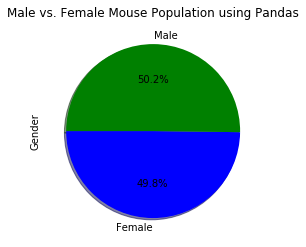

In [34]:
# Generate a pie plot showing the distribution of female versus male 
# mice using pandas


#pie chart
colors = ["blue","green"]

plt.pie(size, labels=list1, colors=colors, autopct="%1.1f%%", 
       shadow=True, startangle=180)

plt.title('Male vs. Female Mouse Population using Pandas')
plt.ylabel('Gender')
plt.show()

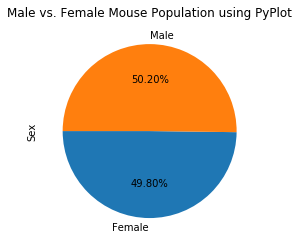

In [35]:
# Generate a pie plot showing the distribution of female versus male 
# mice using pyplot

plotpie = gender["Mouse ID"].plot.pie(y='sizes', figsize=(4,4), autopct="%2.2f%%", startangle=180)

#title
plt.title('Male vs. Female Mouse Population using PyPlot')
plt.ylabel('Sex')
plotpie

## Quartiles, outliers and boxplots

In [36]:
capo_df = data_df.loc[data_df["Drug Regimen"] == "Capomulin",:]
rami_df = data_df.loc[data_df["Drug Regimen"] == "Ramicane",:]
infu_df = data_df.loc[data_df["Drug Regimen"] == "Infubinol",:]
ceft_df = data_df.loc[data_df["Drug Regimen"] == "Ceftamin",:]

capo_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [37]:
cap = capo_df.groupby('Mouse ID').max()['Timepoint']
capvol = pd.DataFrame(cap)
capmerge = pd.merge(capvol, data_df, on=("Mouse ID", "Timepoint"), how="left")
capmerge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [38]:
# Calculate the final tumor volume of each mouse across four of the 
# most promising treatment regimens. Calculate the IQR and quantitatively 
# determine if there are any potential outliers. 

tumorCap = capmerge["Tumor Volume (mm3)"]

quartiles = tumorCap.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.


In [39]:
#Ramicane information
ram = rami_df.groupby('Mouse ID').max()['Timepoint']
ramvol = pd.DataFrame(ram)
rammerge = pd.merge(ramvol, data_df, on=("Mouse ID", "Timepoint"), how="left")
rammerge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [40]:
#Ramicane Quartiles
tumorRami = rammerge["Tumor Volume (mm3)"]

quartilesRami = tumorRami.quantile([0.25, 0.5, 0.75])
lowerqRami = quartilesRami[0.25]
upperqRami = quartilesRami[0.75]
iqrRami = upperqRami - lowerqRami

lower_boundRami = lowerqRami - (1.5*iqrRami)
upper_boundRami = upperqRami + (1.5*iqrRami)

print(f"Ramicane potential outliers could be values below {lower_boundRami} and above{upper_boundRami} could be outliers.")

Ramicane potential outliers could be values below 17.912664470000003 and above54.30681135 could be outliers.


In [41]:
#Infubinol information
inf = infu_df.groupby('Mouse ID').max()['Timepoint']
infvol = pd.DataFrame(inf)
infmerge = pd.merge(infvol, data_df, on=("Mouse ID", "Timepoint"), how="left")
infmerge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [42]:
#Infubinol Quartiles
tumorInfu = infmerge["Tumor Volume (mm3)"]

quartilesInfu = tumorInfu.quantile([0.25,0.5,0.75])
lowerqInfu = quartilesInfu[0.25]
upperqInfu = quartilesInfu[0.75]
iqrInfu = upperqInfu - lowerqInfu

lower_boundInfu = lowerqInfu - (1.5*iqrInfu)
upper_boundInfu = upperqInfu + (1.5*iqrInfu)

print(f"Infubinol potential outliers could be values below {lower_boundInfu} and above {upper_boundInfu} could be outliers.")

Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.


In [43]:
#Ceftamin information
cef = ceft_df.groupby('Mouse ID').max()['Timepoint']
cefvol = pd.DataFrame(cef)
cefmerge = pd.merge(cefvol, data_df, on=("Mouse ID", "Timepoint"), how="left")
cefmerge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [44]:
#Ceftamin Quartiles
tumorCeft = cefmerge["Tumor Volume (mm3)"]

quartilesCeft = tumorCeft.quantile([0.25,0.5,0.75])
lowerqCeft = quartilesCeft[0.25]
upperqCeft = quartilesCeft[0.75]
iqrCeft = upperqCeft - lowerqCeft

lower_boundCeft = lowerqCeft - (1.5*iqrCeft)
upper_boundCeft = upperqCeft + (1.5*iqrCeft)

print(f"Ceftamin potential outliers could be values below {lower_boundCeft} and above {upper_boundCeft} could be outliers.")

Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


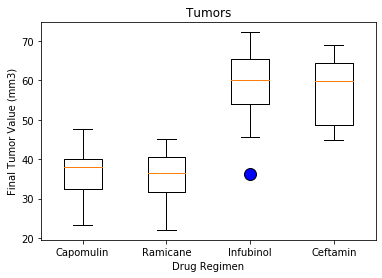

In [45]:
# Generate a box plot of the final tumor volume of each mouse across 
# four regimens of interest
data_to_plot = [tumorCap, tumorRami, tumorInfu, tumorCeft]

color = dict(markerfacecolor='blue', markersize=12)

figl, axl = plt.subplots()
axl.set_title('Tumors')
axl.set_xlabel('Drug Regimen')
axl.set_ylabel('Final Tumor Value (mm3)')

axl.boxplot(data_to_plot, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], flierprops=color)

plt.show()

## Line and scatter plots

In [46]:
line_df = capo_df.loc[capo_df["Mouse ID"] == "l509",:]
line_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2


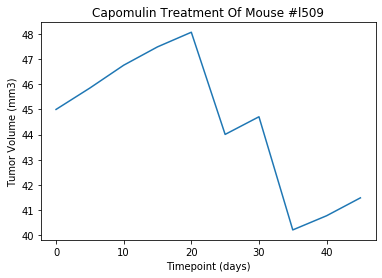

In [47]:
# Generate a line plot of time point versus tumor volume for a mouse 
# treated with Capomulin
'''x_axisline = line_df["Timepoint"]
tumorsize = line_df["Tumor Volume (mm3)"]

plt.title('Capomulin Treatmeant Of Mouse #l509')
plt.plot(x_axisline, tumorsize,linewidth=5, markersize=20)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()'''
capo_df = data_df.loc[data_df["Drug Regimen"] == "Capomulin",:]



mousedata = capo_df.loc[capo_df['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment Of Mouse #l509')
plt.show()
#WHY YOU NO SHOW LINE

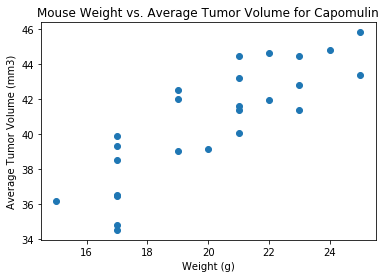

In [48]:
# Generate a scatter plot of mouse weight versus average tumor volume 
# for the Capomulin regimen

capo_df = data_df.loc[data_df['Drug Regimen'] == "Capomulin"]

capoavg = capo_df.groupby(['Mouse ID']).mean()

plt.scatter(capoavg['Weight (g)'], capoavg['Tumor Volume (mm3)'])
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

In [49]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correl=round(st.pearsonr(capoavg['Weight (g)'],capoavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correl}")

The correlation between mouse weight and average tumor volume is 0.84


In [50]:
#Create the model 
graph=st.linregress(capoavg['Weight (g)'], capoavg['Tumor Volume (mm3)'])
graph

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

In [51]:
mslope = 0.9544396890241045
bintercept = 21.552160532685015

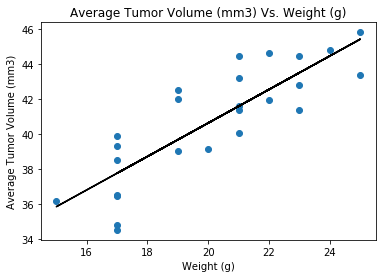

In [52]:
#drawing graph with line going through middle points
yvalues = capoavg['Weight (g)']*mslope+bintercept
plt.scatter(capoavg['Weight (g)'],capoavg['Tumor Volume (mm3)'])
plt.plot(capoavg['Weight (g)'],yvalues,color="black")
plt.title('Average Tumor Volume (mm3) Vs. Weight (g)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()